# Netflix Stock Price Prediction 

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/netflix-stock-price/NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
df.shape

(5422, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5422 non-null   object 
 1   Open       5422 non-null   float64
 2   High       5422 non-null   float64
 3   Low        5422 non-null   float64
 4   Close      5422 non-null   float64
 5   Adj Close  5422 non-null   float64
 6   Volume     5422 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 296.6+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5422,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5.422000e+03
mean,2013-02-26 23:14:19.166359296,131.304057,133.340057,129.201970,131.322955,131.322955,1.594455e+07
min,2002-05-23 00:00:00,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,2007-10-10 06:00:00,4.107500,4.183214,4.031786,4.112857,4.112857,5.960725e+06
50%,2013-02-28 12:00:00,33.700714,34.275714,33.237858,33.833570,33.833570,1.006250e+07
75%,2018-07-17 18:00:00,244.832497,250.257496,237.687497,245.152500,245.152500,1.886930e+07
max,2023-12-05 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08
std,NaN,172.967612,175.451082,170.335958,172.929156,172.929156,1.874197e+07


## Data Cleaning

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Visualization

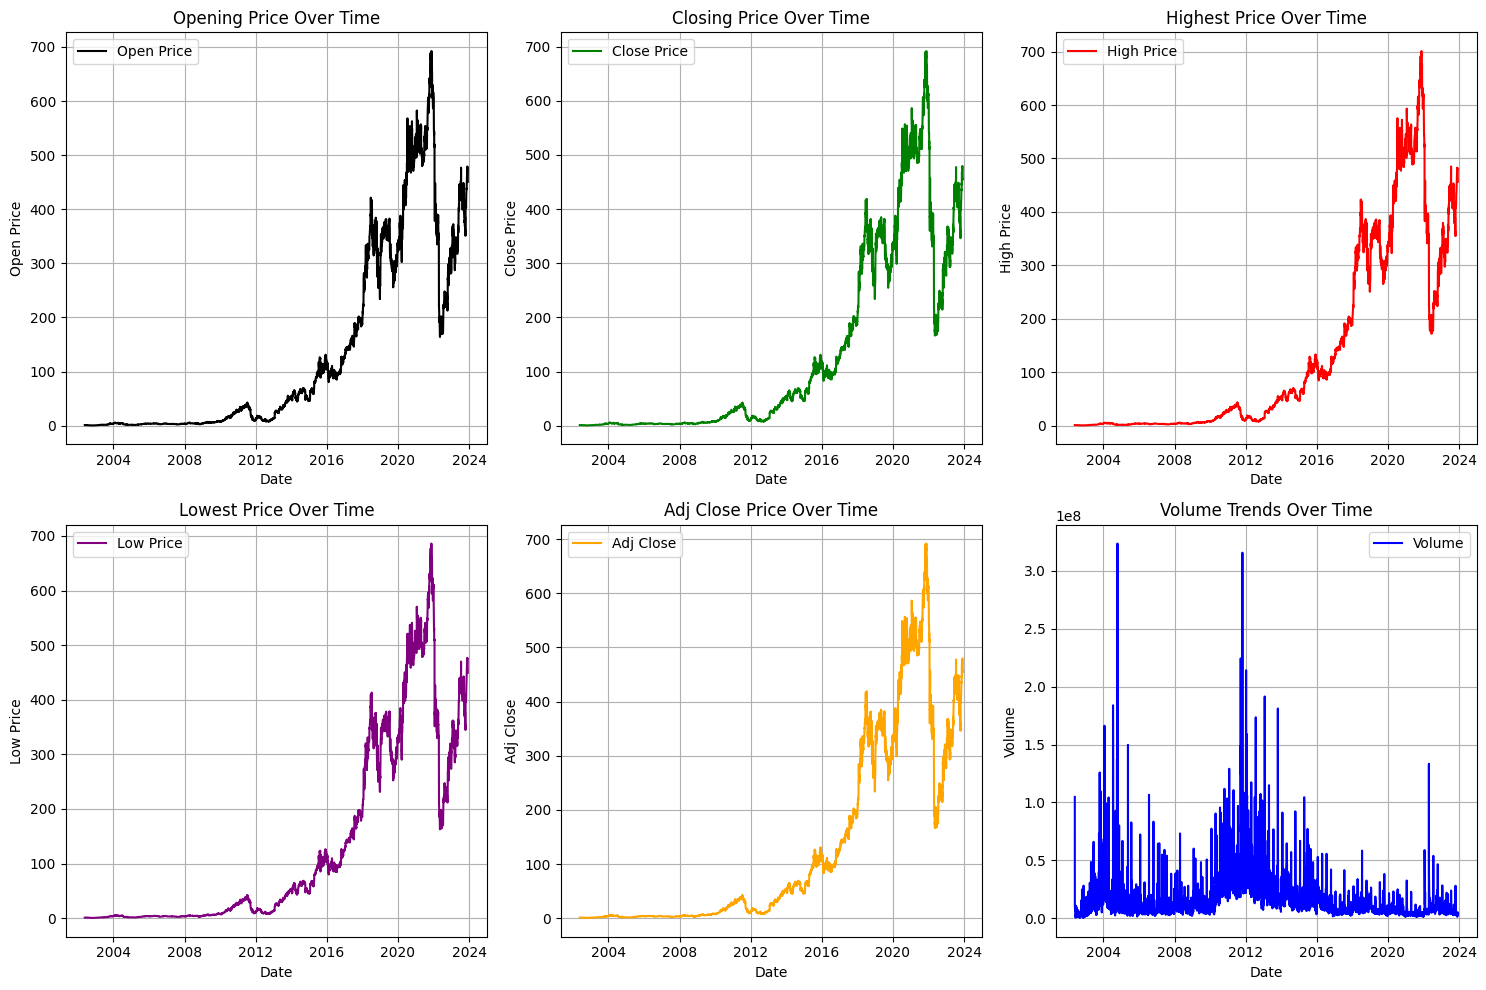

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.plot(df['Date'], df['Open'], color='black', label='Open Price')
plt.title('Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

plt.subplot(232)
plt.plot(df['Date'], df['Close'], color='green', label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.subplot(233)
plt.plot(df['Date'], df['High'], color='red', label='High Price')
plt.title('Highest Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.grid(True)

plt.subplot(234)
plt.plot(df['Date'], df['Low'], color='purple', label='Low Price')
plt.title('Lowest Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.grid(True)

plt.subplot(235)
plt.plot(df['Date'], df['Adj Close'], color='orange', label='Adj Close')
plt.title('Adj Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)

plt.subplot(236)
plt.plot(df['Date'], df['Volume'], color='blue', label='Volume')
plt.title('Volume Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Data Modeling

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']

In [12]:
from sklearn.impute import SimpleImputer
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [14]:
# Initialize Linear Regression model
model = LinearRegression()

In [15]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
y_pred

array([319.299988, 361.480011,  47.774284, ...,   7.675714, 299.109985,
       424.98999 ])

## Performance Analysis

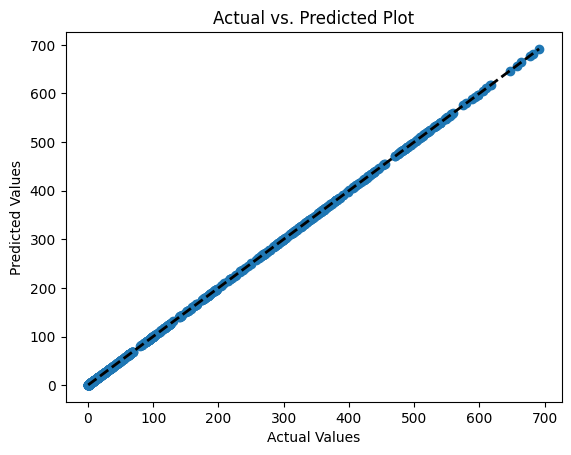

In [18]:
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', linewidth=2)
plt.show()

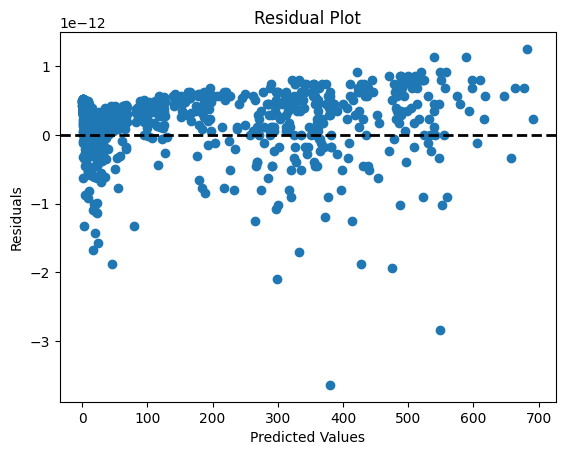

In [19]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.show()

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {r2}')


R-squared on the test set: 1.0


In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 2.2511603475967533e-25


R-squared (R2 Score):

An R-squared value of 1.0 means that your model perfectly predicts the variation in the dependent variable based on the independent variables. It suggests that the model explains 100% of the variability in the target variable, which is highly unusual and might be indicative of overfitting.
While a high R-squared value is generally desirable, a value of 1.0 could also signal overfitting to the training data. It's essential to ensure that the model generalizes well to new, unseen data.

Mean Squared Error (MSE):

An MSE close to zero indicates that the predicted values are very close to the true values in the test set. In fact, the value is very close to zero and is essentially a negligible error.

A low MSE is desirable, but again, extreme values may indicate potential overfitting or other issues.

In [22]:
model.score(X_test,y_test)

1.0